<a href="https://colab.research.google.com/github/jammanbotr/2022chick_python/blob/main/5%2C6%EC%A3%BC%EC%B0%A8_%ED%95%99%EA%B5%B0%EC%A7%80%EC%99%80_%EA%B4%80%EB%A0%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B9%84%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트의 흐름 안내
#1. 학군지의 인구구조에 대해 알아봄
#2. 역별 승하차 인원을 조사함(응봉/광장/대치/목동)
## 이 부분에서 응봉/광장과 대치/목동의 차이가 있음을 알게 되고, 학원 수의 영향을 받는 것 같다는 가설 아래 시간별 승하차 인원을 조사함. 그 이유는 학원을 이용하면 10~11시의 승차인원의 차이가 다를 것이라 예측함
#3. 역별 시간별 승하차 인원을 조사함
## 목동, 대치동의 경우 오후 10시의 승차 인원이 늘어나는 것으로 보아 학원 수강한 학생들이 집으로 가는 것이 아닌가 싶지만, 목동보다는 대치동이 확연한 차이를 보임.
#4. 그럼 대치동과 가장 유사한 인구구조는 어딜까? 하는 것을 보며 '모두의 데이터 분석' 부분을 그대로 구현함
## 대치1동이 중계동과 같아 그럼 지하철 시간별 승하차 인원 구조도 비슷할까 했지만 전혀 다름. 이는 중계동 같은 경우는 동네 수요로 인해 지하철이 큰 영향을 받지 않고 승용차 혹은 버스의 수요가 많지 않을까 싶음.

In [ ]:
#한글 폰트 깔기, 은근 시간이 걸려서 아래 부분과 분리했다.
import matplotlib.pyplot as plt
%matplotlib inline 

!apt-get install fonts-nanum -qq > /dev/null
!fc-cache -fv
import matplotlib as mpl
mpl.font_manager._rebuild()
findfont=mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont=findfont
mpl.backends.backend_agg.findfont=findfont

#마이너스가 깨지는 현상이 생겨 복붙!
plt.rcParams['axes.unicode_minus']=False

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


#1. 학군지의 인구구조에 대해 알아보기

인구구조 비교를 할 곳을 한 곳 입력해주세요 :대치1동
인구구조 비교를 할 곳을 한 곳 입력해주세요 :목1동


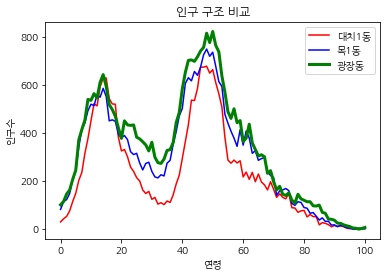

In [ ]:
import csv

plt.rc('font',family='NanumGothic')

f=open('2022 people.csv')
data=csv.reader(f)


people1=[]
people2=[]
people3=[]

name=''
name2=''

name=input('인구구조 비교를 할 곳을 한 곳 입력해주세요 :')  #비교군 1 인구구조 알아보기
for row in data:
  if name in row[0]:
    for i in range(3,104):
      people1.append(int(row[i]))
    break
f.seek(0) #커서 올리기(다음 데이터 또한 처음 행부터 검색 가능하도록)

name2=input('인구구조 비교를 할 곳을 한 곳 입력해주세요 :') #비교군 2 인구구조 알아보기
for row in data:
  if name2 in row[0]:
    for i in range(3,104):
      people2.append(int(row[i]))
    break
f.seek(0)

for row in data:   # '광장동' 인구구조로 비교하기
  if '광장동' in row[0]:
    for i in range(3,104):
      people3.append(int(row[i]))
    break

plt.plot(people1, c='r', label = name)
plt.plot(people2, c='b', label = name2)
plt.plot(people3, c='g', label = '광장동', linewidth=3.0) #광장동과 비교하기 쉽도록 두께를 두껍게 표현하기

plt.title('인구 구조 비교')
plt.xlabel('연령')
plt.ylabel('인구수')
plt.legend()

plt.show()

# 2. 역별 승하차 인원 통계를 내보도록 하자
## 내가 살고 있는 곳과 학군지의 지하철 승하차 인원 통계를 내보면 학군지의 경우 승차보다 하차의 인원이 많은 날도 있고, 승하차 인원 사이가 굉장히 인접하다
### 응봉동, 광장동의 경우는 승차 인원이 보통 하차 인원보다 많다.

###다양한 요인이 있을 것이라 생각이 들지만 혹시 학원 갯수로 인한 차이는 아닐까 싶어 검색을 해보았다.

[20220601, 20220602, 20220603, 20220604, 20220605, 20220606, 20220607, 20220608, 20220609, 20220610, 20220611, 20220612, 20220613, 20220614, 20220615, 20220616, 20220617, 20220618, 20220619, 20220620, 20220621, 20220622, 20220623, 20220624, 20220625, 20220626, 20220627, 20220628, 20220629, 20220630]
[1544, 2076, 2190, 1587, 1247, 1231, 2166, 2115, 2075, 2090, 1719, 1290, 2062, 2125, 2003, 2239, 2248, 1642, 1244, 2147, 2173, 2131, 1951, 2208, 1553, 1157, 1943, 1957, 1933, 1898]
[1348, 1756, 1813, 1315, 1053, 1086, 1858, 1845, 1761, 1769, 1493, 1145, 1688, 1835, 1712, 1819, 1824, 1347, 1121, 1787, 1775, 1807, 1712, 1733, 1345, 1013, 1660, 1618, 1677, 1602]
[20220601, 20220602, 20220603, 20220604, 20220605, 20220606, 20220607, 20220608, 20220609, 20220610, 20220611, 20220612, 20220613, 20220614, 20220615, 20220616, 20220617, 20220618, 20220619, 20220620, 20220621, 20220622, 20220623, 20220624, 20220625, 20220626, 20220627, 20220628, 20220629, 20220630]
[10066, 14845, 14799, 10637, 9221, 7

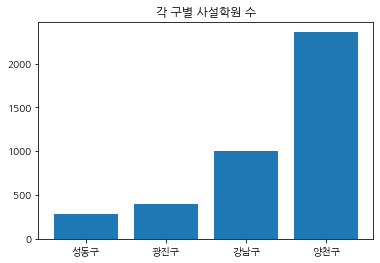

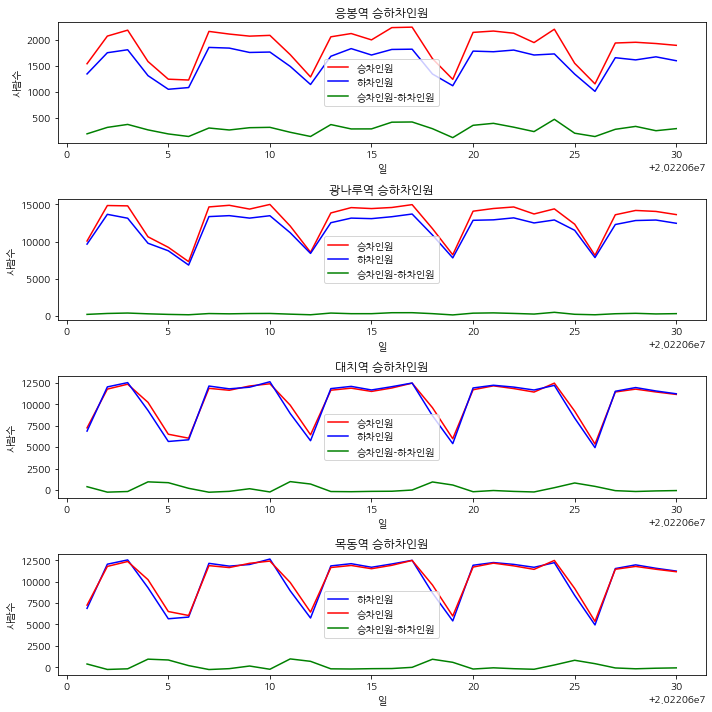

In [ ]:
import csv  
plt.rc('font',family='NanumGothic')

f=open('subway.csv')   #지하철역 정보(2022년 6월 승하차) csv파일 불러오기
data=csv.reader(f)
next(data)

up_eb=[]  #응봉역 승차
day_eb=[]  #응봉역 날짜순
down_eb=[]  #응봉역 하차
updown_eb=[] #응봉역 승차-하차
for row in data:
  if row[2]=='응봉':
    day_eb.append(int(row[0]))
    up_eb.append(int(row[3]))
    down_eb.append(int(row[4]))
    updown_eb.append(int(row[3])-int(row[4]))
print(day_eb)
print(up_eb)
print(down_eb)
f.seek(0)  #커서를 처음으로 올리기
'''-----------------------------------------'''
up_gj=[]  #광나루역(광장동) 승차
day_gj=[]  #광나루역(광장동) 날짜순
down_gj=[]  #광나루역(광장동) 하차
updown_gj=[] #광나루역(광장동) 승차-하차

for row in data:
  if row[2]=='광나루(장신대)':
    day_gj.append(int(row[0]))
    up_gj.append(int(row[3]))
    down_gj.append(int(row[4]))
    updown_gj.append(int(row[3])-int(row[4]))

print(day_gj)
print(up_gj)
print(down_gj)
f.seek(0)   #커서를 처음으로 올리기

'''-----------------------------------------'''

up_dc=[]  #대치역 승차
day_dc=[]  #대치역 날짜순
down_dc=[]  #대치역 하차
updown_dc=[] #대치 승차-하차
spday_dc=[]

for row in data:
  if row[2]=='대치':
    day_dc.append(int(row[0]))
    up_dc.append(int(row[3]))
    down_dc.append(int(row[4]))
    updown_dc.append(int(row[3])-int(row[4]))
    if int(row[3])-int(row[4])<=0:
      spday_dc.append(row[0])


print(day_dc)
print(up_dc)
print(down_dc)
f.seek(0)  #커서 올리기

'''-----------------------------------------'''


up_md=[]   #목동역 승차
day_md=[]   #목동역 날짜순
down_md=[]   #목동역 하차
updown_md=[] #목동역 승차-하차


for row in data:
  if row[2]=='대치':
    day_md.append(int(row[0]))
    up_md.append(int(row[3]))
    down_md.append(int(row[4]))
    updown_md.append(int(row[3])-int(row[4]))

print(day_md)
print(up_md)
print(down_md)


'''-----------------------------------------'''

plt.bar(['성동구','광진구','강남구','양천구'],[289,405,1008,2361])  # 구별 사설 학원수 데이터 조사하여 검색함
plt.title('각 구별 사설학원 수')
## 동별 학원갯수 데이터는 찾지 못함 ㅠㅠㅠ


fig=plt.figure(figsize=(10,10))  # 그래프가 작으면 잘 안보여서 좀 키움
fig2=fig.add_subplot(4,1,1)   # 동별로 그래프를 쪼갬. 4개로 쪼갠 것 중에 하나
fig2.plot(day_eb, up_eb, c='r',label='승차인원')
fig2.plot(day_eb, down_eb,c='b',label='하차인원')
fig2.plot(day_eb, updown_eb,c='g',label='승차인원-하차인원')
fig2.set_xlabel('일')
fig2.set_ylabel('사람수')


fig2.set_title('응봉역 승하차인원')
fig2.legend()


fig1=fig.add_subplot(4,1,2)   # 동별로 그래프를 쪼갬. 4개로 쪼갠 것 중에 두 번쨰
fig1.plot(day_gj, up_gj, c='r',label='승차인원')
fig1.plot(day_gj, down_gj,c='b',label='하차인원')
fig1.plot(day_gj, updown_eb,c='g',label='승차인원-하차인원')
fig1.set_xlabel('일')
fig1.set_ylabel('사람수')

fig1.set_title('광나루역 승하차인원')
fig1.legend()


fig3=fig.add_subplot(4,1,3)   # 동별로 그래프를 쪼갬. 4개로 쪼갠 것 중에 세 번쨰
fig3.plot(day_dc, up_dc, c='r',label='승차인원')
fig3.plot(day_dc, down_dc,c='b',label='하차인원')
fig3.plot(day_eb, updown_dc,c='g',label='승차인원-하차인원')
fig3.set_xlabel('일')
fig3.set_ylabel('사람수')

fig3.set_title('대치역 승하차인원')
fig3.legend()


fig4=fig.add_subplot(4,1,4)    # 동별로 그래프를 쪼갬. 4개로 쪼갠 것 중에 네 번째
fig4.plot(day_md, down_md,c='b',label='하차인원')
fig4.plot(day_md, up_md, c='r',label='승차인원')
fig4.plot(day_eb, updown_md,c='g',label='승차인원-하차인원')
fig4.set_xlabel('일')
fig4.set_ylabel('사람수')

fig4.set_title('목동역 승하차인원')
fig4.legend()

fig.tight_layout()  # 그래프끼리 붙을 때 조정하기 위함

print(spday_dc)


##그래프에서 아래로 움푹 들어가는 부분은 일요일
##응봉역과 광나루역은 승차인원>하차인원
##대치역과 목동역은 승차인원=<하차인원

##수많은 요인들이 있겠지만 학군지인만큼 학원수가 매우 많은 점을 보면 성동구, 광진구가 학원수가 적은 것에 비해 강남구, 양천구에 학원이 많아 그쪽으로 학생 혹은 소비자들이 빠지는 느낌?

#3. 시간대별 지하철 승하차 인원을 하면 사람들의 목적을 좀 더 알 수 있지 않을까?

조사하고 싶은 역명을 입력해주세요 : 중계
-------시간대별 역의 승하차인원을 비교해보겠습니다.-------


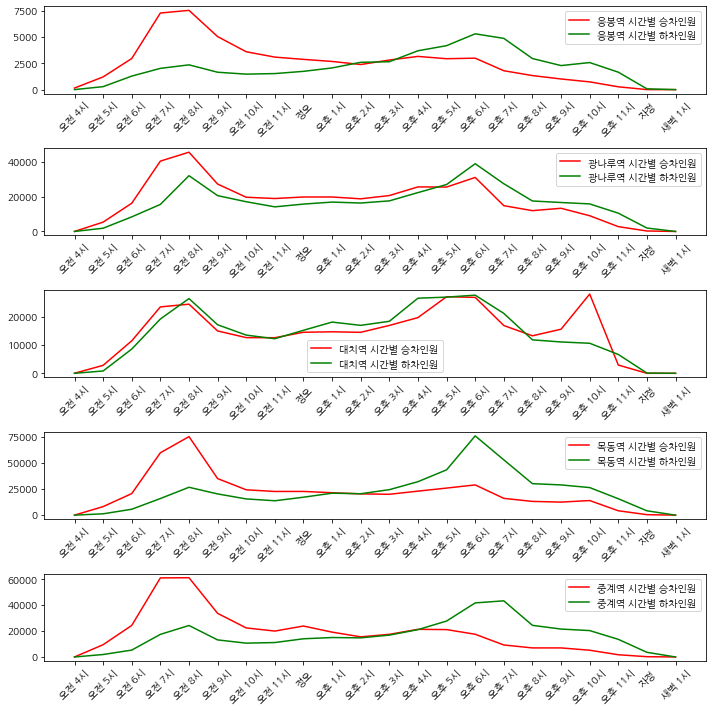

In [ ]:
f=open('timesubway.csv')   #지하철역 정보(2022년 6월 승하차) csv파일 불러오기
data=csv.reader(f)

up_x=['오전 4시', '오전 5시', '오전 6시', '오전 7시', '오전 8시', '오전 9시', '오전 10시', '오전 11시', '정오', '오후 1시', '오후 2시', '오후 3시', '오후 4시', '오후 5시', '오후 6시', '오후 7시','오후 8시', '오후 9시', '오후 10시', '오후 11시', '자정','새벽 1시' ]
next(data)


uptime_eb=[]
downtime_eb=[]


for row in data:  # 응봉역 시간별 승하차 인원
  if row[3]=='응봉':
    for i in range(4,48):
      if i%2==0:
        uptime_eb.append(int(row[i]))
      else:
        downtime_eb.append(int(row[i]))

f.seek(0)

uptime_gj=[]
downtime_gj=[]


for row in data:  # 광나루역 시간별 승하차 인원
  if row[3]=='광나루(장신대)':
    for i in range(4,48):
      if i%2==0:
        uptime_gj.append(int(row[i]))
      else:
        downtime_gj.append(int(row[i]))


f.seek(0)

uptime_dc=[]
downtime_dc=[]


for row in data:  # 대치역 시간별 승하차 인원
  if row[3]=='대치':
    for i in range(4,48):
      if i%2==0:
        uptime_dc.append(int(row[i]))
      else:
        downtime_dc.append(int(row[i]))

f.seek(0)

uptime_md=[]
downtime_md=[]


for row in data:  # 목동역 시간별 승하차 인원
  if row[3]=='목동':
    for i in range(4,48):
      if i%2==0:
        uptime_md.append(int(row[i]))
      else:
        downtime_md.append(int(row[i]))

f.seek(0)

uptime_rd=[]
downtime_rd=[]

name=input('조사하고 싶은 역명을 입력해주세요 : ')
for row in data:  
  if row[3]==name:
    for i in range(4,48):
      if i%2==0:
        uptime_rd.append(int(row[i]))
      else:
        downtime_rd.append(int(row[i]))

print('-------시간대별 역의 승하차인원을 비교해보겠습니다.-------')


fig=plt.figure(figsize=(10,10))  # 그래프가 작으면 잘 안보여서 좀 키움
fig1=fig.add_subplot(5,1,1)   # 동별로 그래프를 쪼갬. 4개로 쪼갠 것 중에 하나
fig1.plot(up_x,uptime_eb,c='r',label='응봉역 시간별 승차인원')
fig1.plot(up_x,downtime_eb,c='g',label='응봉역 시간별 하차인원')
fig1.set_xticklabels(up_x, rotation=45)
plt.legend()

fig2=fig.add_subplot(5,1,2)   # 동별로 그래프를 쪼갬. 4개로 쪼갠 것 중에 하나
fig2.plot(up_x,uptime_gj,c='r',label='광나루역 시간별 승차인원')
fig2.plot(up_x,downtime_gj,c='g',label='광나루역 시간별 하차인원')
fig2.set_xticklabels(up_x, rotation=45)
plt.legend()

fig3=fig.add_subplot(5,1,3)   # 동별로 그래프를 쪼갬. 4개로 쪼갠 것 중에 하나
fig3.plot(up_x,uptime_dc,c='r',label='대치역 시간별 승차인원')
fig3.plot(up_x,downtime_dc,c='g',label='대치역 시간별 하차인원')
fig3.set_xticklabels(up_x, rotation=45)
plt.legend()

fig4=fig.add_subplot(5,1,4)   # 동별로 그래프를 쪼갬. 4개로 쪼갠 것 중에 하나
fig4.plot(up_x,uptime_md,c='r',label='목동역 시간별 승차인원')
fig4.plot(up_x,downtime_md,c='g',label='목동역 시간별 하차인원')
fig4.set_xticklabels(up_x, rotation=45)

plt.legend()


fig4=fig.add_subplot(5,1,5)   # 동별로 그래프를 쪼갬. 4개로 쪼갠 것 중에 하나
fig4.plot(up_x,uptime_rd,c='r',label=name+'역 시간별 승차인원')
fig4.plot(up_x,downtime_rd,c='g',label=name+'역 시간별 하차인원')
fig4.set_xticklabels(up_x, rotation=45)

plt.legend()



fig.tight_layout()
plt.show()

# 대치동과 가장 비슷한 인구구조를 가진 동네를 찾아볼까? (모두의 데이터 분석 참고)
### 느낀점 : 인구구조가 비슷하여 학군지이기는 하지만 여러 요인에 의해 지하철역 승하차 인원의 형태는 다른 것을 알 수 있다.
### 또한 지하철 뿐만이 아닌 버스 등의 다양한 교통을 이용할 수 있음을 고려해야 한다.

인구구조가 비슷한 곳을 알고 싶은 지역의 이름을 입력해주세요 : 대치1동


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


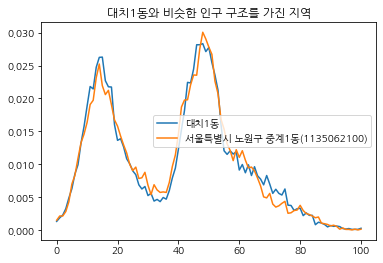

In [ ]:
import numpy as np
import csv

f=open('2022 people.csv')
data=csv.reader(f)
next(data)
data=list(data)

home=[]
name=input('인구구조가 비슷한 곳을 알고 싶은 지역의 이름을 입력해주세요 : ')
mn=1
result_name=''
result=[]


for row in data:
  if name in row[0]:
    for i in row[3:]:
      home=np.array(row[3:], dtype=int) / int(row[2])

for row in data:
  away=np.array(row[3:], dtype=int)/int(row[2])
  s=np.sum(abs(home-away))
  if s<mn and name not in row[0]:
    mn=s
    result_name=row[0]
    result=away

plt.rc('font',family='NanumGothic')
plt.title(name + '와 비슷한 인구 구조를 가진 지역')
plt.plot(home, label=name)
plt.plot(result, label=result_name)
plt.legend()
plt.show()
